In [70]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
#Import test and train datasets
df_train = pd.read_csv('Resources/train.csv')
df_test = pd.read_csv('Resources/test.csv')

#View first 5 lines of training data
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
df_train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [14]:
df_train.days_with_fog.unique()

array([ nan,  12.,  89.,  88.,  90., 104., 113., 184., 126., 107.,  82.,
        84., 120., 178., 156., 110., 106., 311.,  86.,  37., 289., 176.,
        58., 267.,  73., 161.,  99.,  93., 114.,  79.,  56.,  63., 101.,
       111., 148., 131.,  65.,  87.,  31., 125., 116.,  51., 261.])

In [15]:
df_train['days_with_fog']=df_train['days_with_fog'].fillna(0)
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,3.899395,4


In [17]:
df_train.year_built.unique()  

array([1942., 1955., 1951., 1980., 1985., 1956., 1982., 1947., 1929.,
       1979., 1927., 1960., 1924.,   nan, 1949., 1926., 1914., 1973.,
       1900., 1913., 1962., 1989., 1967., 1954., 1986., 1906., 1912.,
       1902., 1920., 1905., 1997., 1909., 2002., 1974., 1907., 1908.,
       1988., 1987., 1923., 1948., 1966., 1975., 1934., 1938., 1983.,
       2003., 1915., 1961., 1911., 1925., 1964., 1953., 1957., 2006.,
       1990., 1991., 1969., 1968., 1910., 1937., 1971., 1965., 1946.,
       1917., 1901., 2000., 2008., 1999., 1981., 2001., 1978., 1898.,
       1928., 1970., 1918., 1930., 1903., 1936., 1921., 1922., 1984.,
       1976., 1952., 1959., 1916., 1963., 1972., 1919., 1931., 1958.,
          0., 1994., 1940., 2010., 2009., 1889., 1939., 1945., 1904.,
       1932., 1941., 1977., 1993., 1992., 1950., 1944., 1935., 1996.,
       1995., 1933., 1943., 2007., 2005., 2004., 1869., 2011., 2012.,
       1864., 1998., 1895., 1896., 1875., 1880., 1888., 1897., 1891.,
       2013., 1887.,

In [20]:
df_train.loc[df_train['year_built'] == 0]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
353,1,State_1,Commercial,Lodging_Hotel,204392.0,0.0,61.0,59.1,36,50.500000,...,14,0,0,0,NaN,NaN,NaN,0.0,82.627179,353
955,2,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,87.526794,955
2159,3,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,9.1,22,44.790323,...,72,10,0,0,NaN,NaN,NaN,0.0,75.362740,2159
3415,4,State_1,Commercial,Lodging_Hotel,204392.0,0.0,68.0,9.1,41,55.096774,...,27,6,0,0,NaN,NaN,NaN,0.0,61.793699,3415
4535,5,State_1,Commercial,Lodging_Hotel,204392.0,0.0,76.0,9.1,29,51.387097,...,136,52,10,0,NaN,NaN,NaN,0.0,59.503653,4535
5571,6,State_1,Commercial,Lodging_Hotel,204392.0,0.0,78.0,45.7,37,52.693548,...,16,2,0,0,NaN,NaN,NaN,0.0,60.833333,5571


In [21]:
df_train.energy_star_rating.unique()

array([ 11.,  45.,  97.,  46., 100.,  nan,  56.,  99.,  98.,  83.,  51.,
        81.,  29.,  13.,  93.,  59.,  82.,  53.,  60.,  26.,  44.,  55.,
        86.,  25.,  94.,  74.,  96.,  90.,  71.,  70.,  65.,  77.,  57.,
        61.,  54.,   6.,  75.,  73.,  91.,  92.,  85.,  88.,  89.,  67.,
        78.,  76.,  87.,  33.,  48.,  58.,  63.,  39.,  52.,  23.,  42.,
        64.,  69.,  62.,  84.,  24.,  80.,  15.,  95.,  66.,  72.,  79.,
        27.,  41.,  38.,  10.,  14.,  35.,   3.,   7.,  43.,  31.,   4.,
        36.,  49.,  17.,   0.,   1.,  40.,  50.,  12.,  37.,  32.,  22.,
        34.,  68.,   5.,  16.,  30.,  47.,   9.,  19.,   2.,  21.,  28.,
        18.,  20.,   8.])

In [23]:
df_train.max_wind_speed.unique()

array([ 1. ,  nan, 12.5, 10.7, 13.4, 21.5, 16.5, 19.7, 17.9, 17.4, 15.7,
       17. , 20.6, 19.2, 18.3, 13. , 23.3])

### What need to do for data triming: (1) change fog value from nan to 0 (2) drop all the value when year_built = 0 (3) try to remove and set new category for the nan value in the energy_star_rating ,max_wind_speed,direction_max_wind_speed,direction_peak_wind_speed

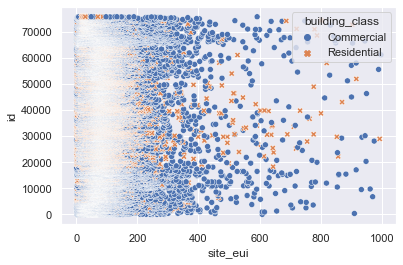

In [8]:
#EDA process

sns.scatterplot(
    data=df_train,
    x="site_eui", y="id",
    hue="building_class",style="building_class"
)

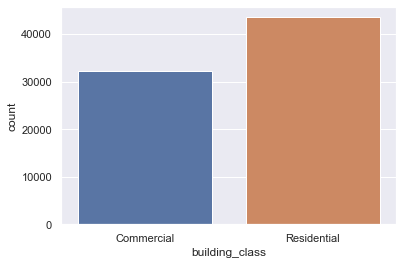

In [9]:
sns.countplot(x='building_class',data=df_train)

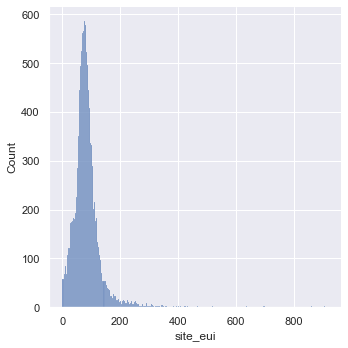

In [13]:
#drop the null value

df_train_drop = df_train.dropna()
sns.displot(data = df_train_drop, x="site_eui", kde=False)

In [27]:
#replace all the nan value of column energy_star_rating ,max_wind_speed,direction_max_wind_speed,direction_peak_wind_speed from 0 to 10000
df_train_replace = df_train.copy()

df_train_replace['energy_star_rating'] = df_train_replace['energy_star_rating'].fillna(10000)
df_train_replace['max_wind_speed'] = df_train_replace['max_wind_speed'].fillna(10000)
df_train_replace['direction_max_wind_speed'] = df_train_replace['direction_max_wind_speed'].fillna(10000)
df_train_replace['direction_peak_wind_speed'] = df_train_replace['direction_peak_wind_speed'].fillna(10000)
df_train_replace['year_built'] = df_train_replace['year_built'].fillna(10000)
df_train_replace.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,10000.0,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,10000.0,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,10000.0,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,3.899395,4


In [35]:
df_train_replace['State_Factor'].unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

In [37]:
df_test_replace['State_Factor'].unique()

array(['State_1', 'State_2', 'State_4', 'State_8', 'State_11', 'State_10'],
      dtype=object)

In [39]:
df_train_replace['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

In [60]:
df_test_replace['building_class'].unique()

array([0, 1])

In [61]:
#replace all the nan value of column energy_star_rating ,max_wind_speed,direction_max_wind_speed,direction_peak_wind_speed from 0 to 10000
df_test_replace = df_test.copy()
df_test_replace['energy_star_rating'] = df_test_replace['energy_star_rating'].fillna(10000)
df_test_replace['max_wind_speed'] = df_test_replace['max_wind_speed'].fillna(10000)
df_test_replace['direction_max_wind_speed'] = df_test_replace['direction_max_wind_speed'].fillna(10000)
df_test_replace['direction_peak_wind_speed'] = df_test_replace['direction_peak_wind_speed'].fillna(10000)
df_test_replace['year_built'] = df_test_replace['year_built'].fillna(10000)
df_test_replace['days_with_fog'] = df_test_replace['days_with_fog'].fillna(0)
df_test_replace.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,0.0,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,0.0,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,0.0,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,0.0,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [54]:
#define a encoder function

def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include = ['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding'+feature)
    return df

In [56]:
df_test_replace = Encoder(df_test_replace)
df_test_replace.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,0,0,13,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,NaN,75757
1,7,0,0,13,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,NaN,75758
2,7,0,0,13,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,NaN,75759
3,7,0,0,13,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,10000.0,10000.0,10000.0,NaN,75760
4,7,0,0,13,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [62]:
df_test_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9705 non-null   float64
 6   energy_star_rating         9705 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [63]:
df_train_replace = Encoder(df_train_replace)
df_train_replace.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,10000.0,1.0,12.0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,10000.0,1.0,12.0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,10000.0,1.0,12.0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,0.0,3.899395,4


In [64]:
df_train_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  int64  
 2   building_class             75757 non-null  int64  
 3   facility_type              75757 non-null  int64  
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         75757 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

# use df_train_replace to fit in simple model

In [ ]:
# choose a baseline model to use


#dividing the x and y of the train data

X_train_lr = df_train_replace.drop(['site_eui'], axis =1)
y_train_lr = df_train_replace['site_eui']

#solve the problem of unknown label type
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train_lr)

#select random forest model

model = RandomForestClassifier(n_estimators=100)
model

In [ ]:
model.fit(X_train_lr, training_scores_encoded)

In [ ]:
X_test_lr = df_test_replace
y_test_lr = model.predict(X_test_lr)
print(y_test_lr)

In [ ]:
#find the score of train and test data

print(f"Training Data Score:{model.score(X_train_lr,training_scores_encoded)}")
print(f"Test Data Score:{model.score(X_test_lr,y_test_lr)}")